## <center> *Ensemble Learning* 

### Introduction, investigation and analysis of various techniques 


### Ensemble Learning Fundamentals  

Ensemble learning refers to the procedures employed to train multiple learning machines and combine their outputs, treating them as a “committee” of decision makers. The principle is that the decision of the committee, with individual predictions combined appropriately, should have better overall accuracy, on average, than any individual committee member.  

The members of the ensemble might be predicting real-valued numbers, class labels, posterior probabilities, rankings, clusterings, or any other quantity. Therefore, their decisions can be combined by many methods, including averaging, voting, and probabilistic methods. 

Ensemble learning can be represented through the following mathematical formulations for point and probability estimates respectively: 

Point estimate:
$f(y|x, π)=\sum_{m=1}^{M} w_m f_m(y|x)$

Probability estimate: 
$p(y|x, \boldsymbol{\pi}) = \sum_{m=1}^{M} \pi_m p(y|x, m)$

where:

*   $w_m$ is the tunable parameter (i.e. weight assigned to the m-th base model), which can be determined using accuracy/performance indicators or uniformly 

*   $f_m$ is the prediction of the m-th base model in the ensemble for the input variable $x$ and the target variable $y$,  

*   $π$ is the ensemble model hyperparameter, which depends on the type of ensemble model being used.  (E.g. for a bagging ensemble, which trains multiple base models on random subsets of the training data, π might represent the number of base models to include in the ensemble and the random seed used to generate the subsets, while for a boosting ensemble, which trains multiple base models sequentially, π might represent the learning rate or the maximum depth of the base models). 

*   $p(y|x, m)$ is the m-th model that estimates the probability of y given the input $x$ 

Ensemble learning is closely related to learning adaptive-basis function models and can be even claimed to be a neural net where $f_m$ represents the m-th hidden unit and $w_m$ are the output layer weights. 

The most important characteristics of Ensemble Learning is that is corresponds to enlarging the model scope by defining single new model which is a convex combination of base models. 

However, it is important to note that Ensemble Learning is not equivalent to BMA (Bayes Model Averaging), which is a weighted average of the predictions made by each model given by: 
 

$p(y|x, D) = \sum_{m=1}^{M} p(y|x, m,D) p(m|D)$

The latter is a probabilistic approach, whereby weights assigned to each model reflect their posterior probabilities derived through Bayes' theorem. 

### Ensemble algorithm 

The ensemble algorithm diversifies the model predictions using multiple algorithms. 


![alt text](ensemble_algorithm.webp "Ensemble Algorithm")

An important aspect of Ensemble learning is aggregation of predictions and how exactly they work 

Aggregating Predictions  can happen in the following ways: 

*   Max Voting: The final prediction in this technique is made based on majority voting for classification problems.  

    *   Hard voting is for models that predict class labels.  

    *   Soft voting is for models that predict class membership probabilities.  

*   Averaging: Typically used for regression problems where predictions are averaged. The probability can be used as well, for instance, in averaging the final classification. This makes sense when all the models in the ensemble have a similar performance  

*   Weighted Average: Sometimes, we need to give weights to some models/algorithms when producing the final predictions. If some models consistently outperform others in the ensemble, or the individual models in the ensemble have different levels of uncertainty or reliability in their predictions, or If the ensemble contains both weak and strong models, this could make sense.  

Voting ensemble method also has its limitations: 

1. An individual model can outperform a group of models (e.g. in a regression problem, if the predictive features and the target variable have a strong linear relationship, a single linear regression model can surely perform very well. However, a voting estimator made with other regression models will nullify the accurate predictions of the linear regression model.) 

2. Since voting requires the use of multiple models, they are naturally more computationally intensive, leading to more costly creation, training, and deployment of models.  

3. Voting only serves to benefit when the machine learning classifiers perform at similar levels. A voting estimator built from models with contrasting levels of efficiency may perform erratically. 

The most common types of ensemble learning are Bagging, Boosting and Stacking. 



### Bagging and Boosting 

Bagging (often) considers homogeneous weak learners, learns them independently from each other in parallel, and combines them following some deterministic averaging process. Examples: Random Forest, Extra Trees algorithm. 

Boosting (often) considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones), combines them following a deterministic strategy. Examples: Gradient Boosting, ADABoost, XGBoost. 

![alt text](bagging_boosting.jpg "Bagging Boosting")


#### Similarities 

*   Can both be used for classification (discrete output) and regression (continuous output) problems. 

*   Both are better in performance compared to single models as they aggregate the output of all the weak learning via voting leading to higher accuracy in predictions. 

#### Differences 

*   Individual trees/models are independent of each other for Bagging, while not independent for Boosting 

*   In bagging there is no concept from learning from each other, while in boosting each tree learns from mistakes of previous trees and tries to minimize the residual error as it keeps moving  forward sequentially. 

*   In bagging learning rate is not used as a hyperparameter (due to independent trees) while in Boosting it is one 

*   Bagging can help reduce variance, while Boosting can help reduce both variance and bias. 


### Stacking 



 

Stacking is the process of combining various estimators (different weak learners) that are fitted independently from each other and a meta-model trained on top of that to predict outputs based on the outputs returned by the base models. 

It can be used for classification and regression problems., (often) considers heterogeneous weak learners, learns them in parallel, combines them by training a meta-model to output a prediction based on the different weak model's predictions 

The general framework of a stacked ensemble consists of: 

*   Base-Models (Level-0 Models): Models that fit the training data and predict out-of-sample data. 

*   Meta-Model (Level-1 Model): Model that fits on the prediction from base-models and learns how to best combine the predictions. 

The way that the meta-model is trained is different to the way the base-models are trained. The input to the meta-model are the predictions made by the base-models, not the raw inputs from the dataset. The target is the same expected target value. The predictions made by the base-models used to train the meta-model are for examples not used to train the base-models, meaning that they are out of sample.  

The meta-model is trained to best combine the capabilities of the base-models when they are making out-of-sample predictions, e.g. examples not seen during training. 

Stacking can be visualized with the following two illustrations outlining the essentials of conventional stacking and multi-level stacking: 

*Stacking*

![alt text](Stacking.webp "Stacking")

*Multi-level stacking*

![alt text](mlstacking.webp "Multi-level stacking")


*Multi-level stacking - extension of stacking is multi-level stacking*

Consisting of doing stacking with multiple layers. 

Example of 3-levels stacking: 

*   1st layer: fit the L weak learners that we chose. 

*   2nd layer: we fit M such meta-models instead of fitting a single meta-model 

*   3rd layer: we fit a last meta-model that takes as inputs the predictions returned by the M meta-models of the previous level 

## *Application*

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import  XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm.sklearn import LGBMRegressor

#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

from sklearn.utils import shuffle

import zipfile
import glob
import os
from PIL import Image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing import image
import re


In [2]:
from verstack import Stacker

## *Regression Model*

### *We'll work with the parkinson dataset*
*Data obtained from https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring*

In [3]:
df = pd.read_csv("parkinsons_updrs.data")
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


### *Description*
*This dataset is composed of a range of biomedical voice measurements from people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

### *Columns*
*Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.*


In [5]:
df2 = df.drop(columns="subject#")

<Axes: >

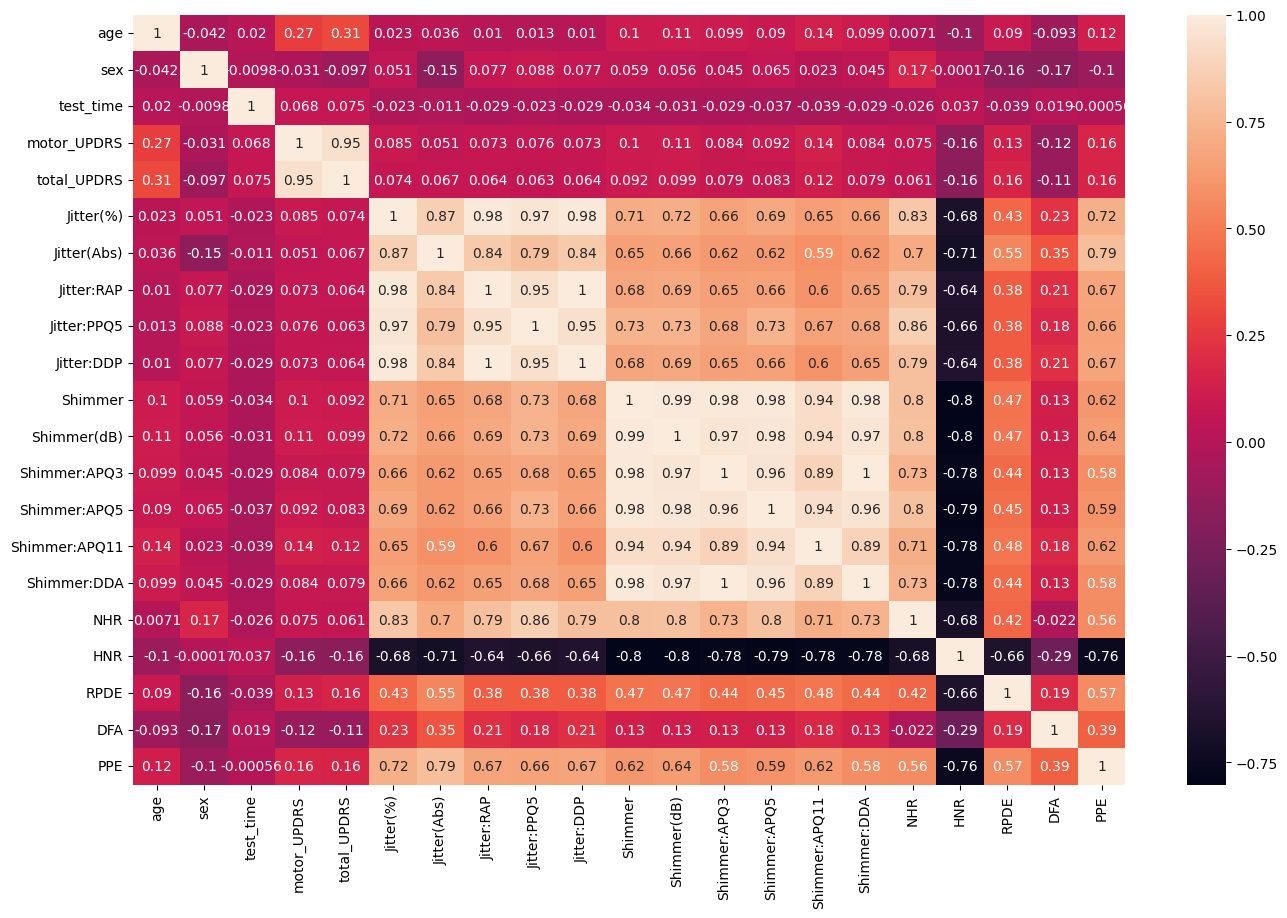

In [6]:
df_corr = df2.corr()

plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True)

In [7]:
# we remove the target variables and 'age', since there is a correlation with the target variables and when included, the model is based mostly on this variable and not the voice measurements.
X = df2.drop(columns=['motor_UPDRS', 'total_UPDRS', 'age'])
y1 = df2[['motor_UPDRS']]
y2 = df2[[ 'total_UPDRS']]

In [8]:
# we define the base and the meta model
base_models_reg = [
    ('KNN', KNeighborsRegressor()),
    ('SVR',SVR()),
    ('Random Forest',RandomForestRegressor()),
    ('Linear Regression',LinearRegression()),
    ('XGboost',XGBRegressor()),
    ('Ridge',Ridge()),

    ]
stacked_reg = StackingRegressor(
    estimators = base_models_reg,
    final_estimator = LinearRegression(),
    cv = 5)

In [9]:
#we define empty df to store the metrics of the models
r2_df=pd.DataFrame(columns=['KNN',
  'SVR',
  'Random Forest',
  'Linear Regression',
  'XGboost',
  'Ridge',
  'Stacked'])
mse_df=pd.DataFrame(columns=['KNN',
  'SVR',
  'Random Forest',
  'Linear Regression',
  'XGboost',
  'Ridge',
  'Stacked'])


*The model will be run 10 times in order to obtain the average of the results and minimize the random variability*

In [10]:
nr_iterations = 10
for i in range(nr_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y1)
    r2_results=[]
    mse_results=[]
    mod_names = []

    for name, model in base_models_reg:
        start_time = time.time()
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        end_time = time.time()
        
        r2 = model.score(X_test, y_test)
        rmse = mean_squared_error(y_test, prediction, squared = False)
        
        r2_results.append(r2)
        mse_results.append(rmse)
        mod_names.append(name)

        print("-------{}-------".format(name))
        print("Coefficient of determination: {}".format(r2))
        print("Root Mean Squared Error: {}".format(rmse))
        print("Computation Time: {}".format(end_time - start_time))
        print("----------------------------------\n")
    start_time = time.time()
    stacked_reg.fit(X_train, y_train)    
    stacked_prediction = stacked_reg.predict(X_test)
    end_time = time.time()
    stacked_r2 = stacked_reg.score(X_test, y_test)
    stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared = False)

    r2_results.append(stacked_r2)
    mse_results.append(stacked_rmse)
    mod_names.append("Stacked")

    print("-------Stacked Ensemble-------")
    print("Coefficient of determination: {}".format(stacked_r2))
    print("Root Mean Squared Error: {}".format(stacked_rmse))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------")
    r2_df.loc[len(r2_df)]=r2_results
    mse_df.loc[len(mse_df)]=mse_results


-------KNN-------
Coefficient of determination: 0.13639272252766288
Root Mean Squared Error: 7.642079009562724
Computation Time: 0.17293000221252441
----------------------------------

-------SVR-------
Coefficient of determination: 0.022524487910580593
Root Mean Squared Error: 8.13029529919682
Computation Time: 0.7575778961181641
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.4482766574442334
Root Mean Squared Error: 6.108211355904426
Computation Time: 3.112147331237793
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.09541586013981618
Root Mean Squared Error: 7.82128049361833
Computation Time: 0.014984130859375
----------------------------------

-------XGboost-------
Coefficient of determination: 0.4521583519865975
Root Mean Squared Error: 6.086686018851283
Computation Time: 1.808577060699463
----------------------------------

-------Ridge-------
Coefficient of determination: 0.09367

In [11]:
stacked_reg.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('KNN', KNeighborsRegressor()), ('SVR', SVR()),
                              ('Random Forest', RandomForestRegressor()),
                              ('Linear Regression', LinearRegression()),
                              ('XGboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eva...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                              ('Ridge', Ridge())],
                  final_estimator=LinearRegression())

In [12]:
r2_df

,KNN,SVR,Random Forest,Linear Regression,XGboost,Ridge,Stacked
0,0.136393,0.022524,0.448277,0.095416,0.452158,0.093674,0.514486
1,0.084106,0.005840,0.411903,0.114563,0.435800,0.089115,0.480192
2,0.122345,0.013603,0.457143,0.083084,0.464888,0.075627,0.512995
3,0.133213,0.019587,0.460596,0.106355,0.492540,0.101960,0.534134
4,0.081317,0.018615,0.426438,0.114734,0.432390,0.101715,0.481901
5,0.086356,0.016194,0.425992,0.112297,0.451547,0.099781,0.493765
6,0.086887,0.017787,0.433098,0.127392,0.452331,0.098433,0.495192
7,0.063644,0.014712,0.440478,0.102380,0.470897,0.079592,0.507360
8,0.068495,0.020149,0.419553,0.087709,0.432502,0.090434,0.479477
9,0.119726,0.020656,0.476171,0.131510,0.484983,0.102082,0.546123


In [13]:
col_ord = r2_df.mean().sort_values(ascending=True).index
mse_df=mse_df[col_ord]
r2_df=r2_df[col_ord]

*Now we will use a different library: Verstack to run a model with two layers of base models*

In [14]:
df3 = df2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train, test = train_test_split(df3, random_state=42)

In [15]:
r2_df2=r2_df.copy()
mse_df2=mse_df.copy()

In [16]:
for i in range(nr_iterations):
    # initialize Stacker
    stacker_mod = Stacker(objective = 'regression',
                  auto = False,
                  stacking_feats_depth = 2,
                  include_X = True)
    
    # add layers
    stacker_mod.add_layer([XGBRegressor(max_depth = 6, n_jobs = -1)
    , GradientBoostingRegressor(max_depth = 7)
    , ExtraTreesRegressor(max_depth = 8)
    , RandomForestRegressor(max_depth = 7)
    , LinearRegression()
    , KNeighborsRegressor(n_neighbors=15)
    , KNeighborsRegressor(n_neighbors=10)
    , SVR(kernel = 'rbf')
    , DecisionTreeRegressor(max_depth = 10)
    , DecisionTreeRegressor(max_depth = 6)
    ])
    stacker_mod.add_layer([DecisionTreeRegressor(max_depth = 6)
    , Ridge()])

    train, test = train_test_split(df3)
    X_train = train.drop(columns=['motor_UPDRS', 'total_UPDRS'])
    y_train = pd.Series(train[['motor_UPDRS']].values.reshape(len(train),))
    X_test = test.drop(columns=['motor_UPDRS', 'total_UPDRS'])
    y_test = pd.Series(test[['motor_UPDRS']].values.reshape(len(test),))
    
    X_st = stacker_mod.fit_transform(X_train, y_train)
    X_test_st = stacker_mod.transform(X_test)
    
    # get lists of features created in each layer
    layer_1_feats = stacker_mod.stacked_features['layer_1']
    layer_2_feats = stacker_mod.stacked_features['layer_2']
    
    #define the final model
    model = Ridge()
    # use only the second layer outputs as inputs in to the final meta_model
    model.fit(X_st[layer_2_feats], y_train)
    pred = model.predict(X_test_st[layer_2_feats])
    stacked_r2_2ndl = r2_score(y_test, pred)
    stacked_rmse_2nl = mean_squared_error(y_test, pred, squared = False)
    r2_df2.loc[i,"Stacked 2nd Layer"]=stacked_r2_2ndl
    mse_df2.loc[i,"Stacked 2nd Layer"]=stacked_rmse_2nl    

    # use both layers outputs as inputs in to the final meta_model
    model.fit(X_st[layer_1_feats + layer_2_feats], y_train)
    pred2 = model.predict(X_test_st[layer_1_feats + layer_2_feats]) 
    stacked_r2_2and1ndly = r2_score(y_test, pred2)
    stacked_rmse_2and1ndly = mean_squared_error(y_test, pred2, squared = False)

    r2_df2.loc[i,"Stacked 2nd and 1st Layer"]=stacked_r2_2and1ndly
    mse_df2.loc[i,"Stacked 2nd and 1st Layer"]=stacked_rmse_2and1ndly


 * Initiating Stacker.fit_transform

   - Training/predicting with layer_1 models
     . Optimising model hyperparameters


     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. Model not in optimisation list ExtraTreesRegressor(max_depth=8)
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. Model not in optimisation list LinearRegression()
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained

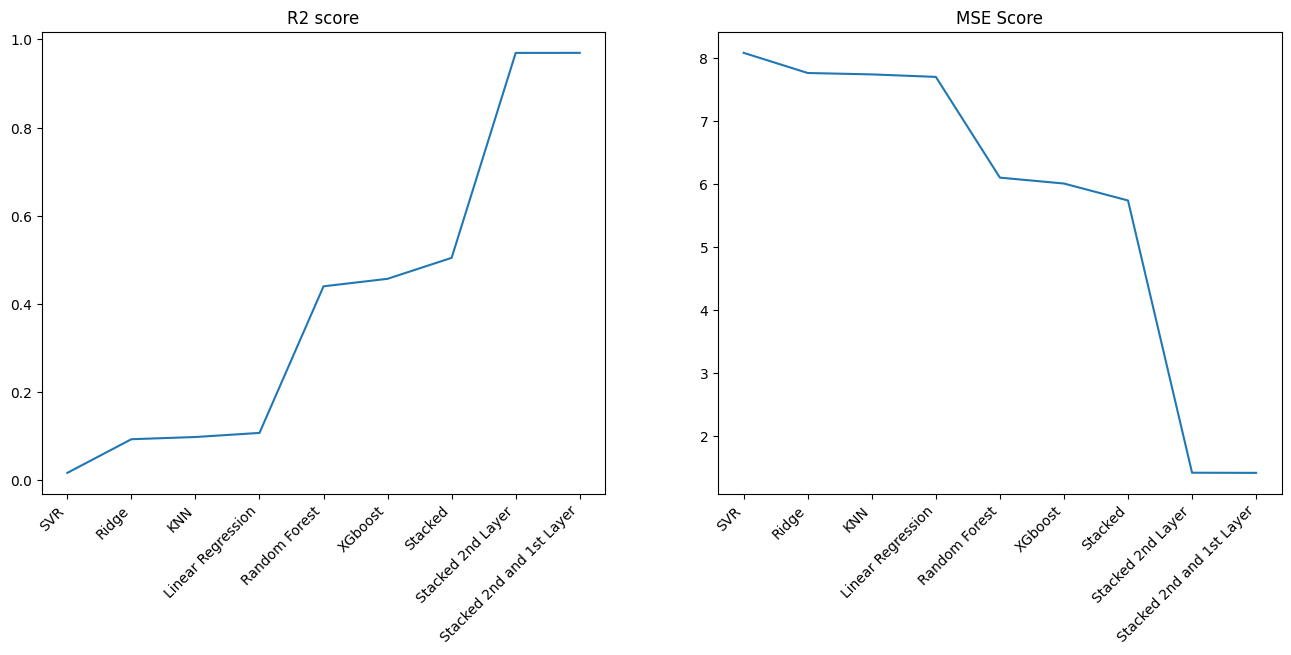

In [17]:
#we plot the average of the metrics
plt.figure(figsize=(16, 6)) 
plt.subplot(1, 2, 1)
plt.title("R2 score")
plt.plot(r2_df2.mean())
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.subplot(1, 2, 2)
plt.title("MSE Score")

plt.plot(mse_df2.mean())
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

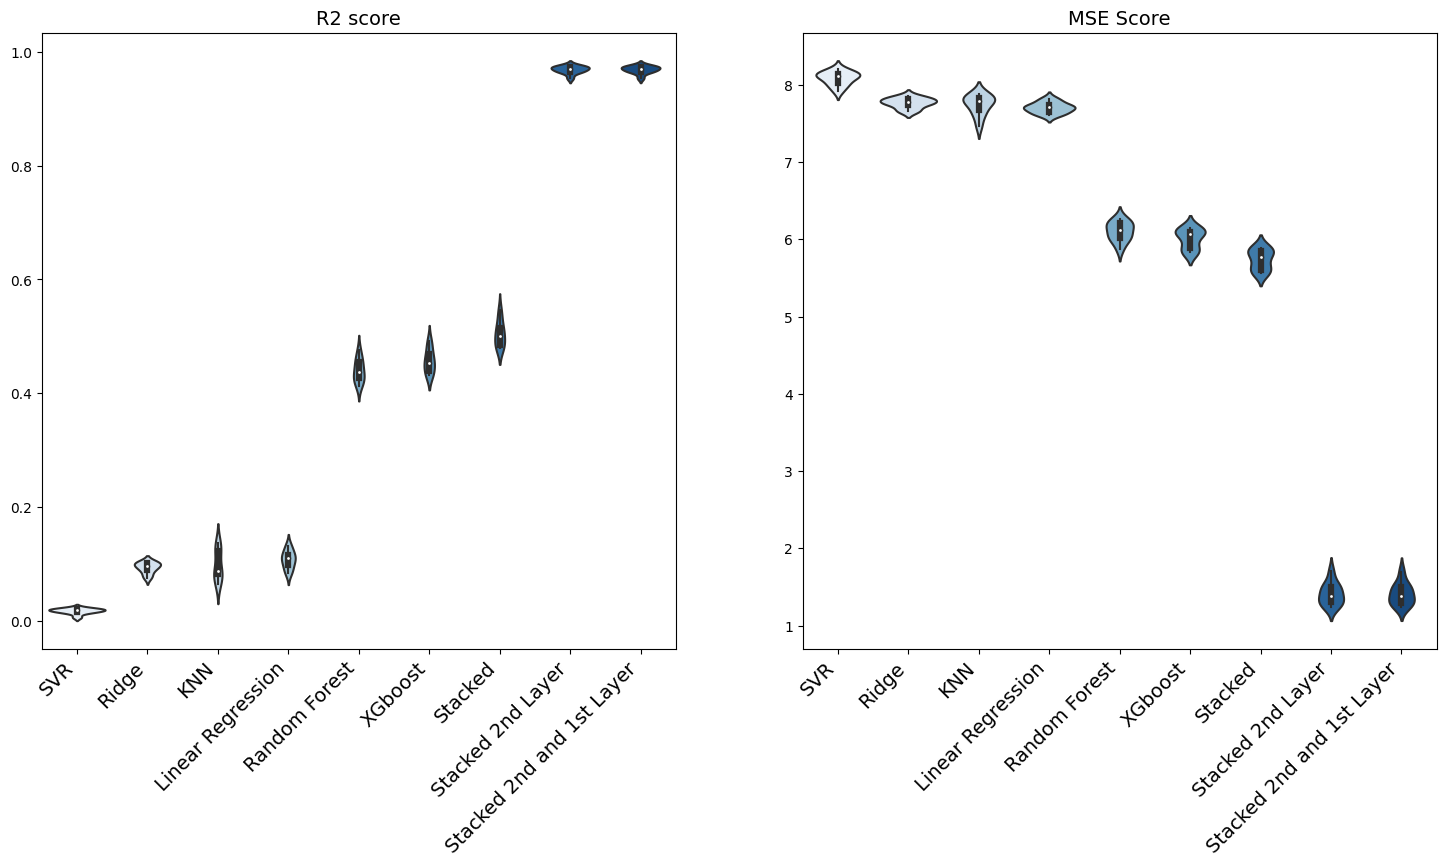

In [18]:
# we generate violin plot to better observe the results
plt.figure(figsize=(18, 8)) 
plt.subplot(1, 2, 1)
plt.title("R2 score", fontsize=14)
sns.violinplot(r2_df2, palette="Blues")
plt.xticks(rotation=45, ha='right', fontsize=14)

plt.subplot(1, 2, 2)
plt.title("MSE Score", fontsize=14)
sns.violinplot(mse_df2,palette="Blues")
plt.xticks(rotation=45, ha='right', fontsize=14)

plt.show()

In [19]:
r2_df2.to_csv("r2_results2_reg.csv")
mse_df2.to_csv("ms2_results2_reg.csv")

*We can conclude that for the dataset analyzed ensemble models outperform individual models. Particularly stacked models with 2 layers, perform considerably better than the rest. With lower metrics the following model is XGboost, a boosting ensemble and closely Random Forest, a bagging ensemble.*

*We think that because of the nature of the dataset, the multilayer stacked model might be overfitting the dataset, specially considering it is a small dataset and that there could be multiple measurements for the same person over time.*

## *Classifier Model*

### *First we'll work with the Digits dataset*

In [20]:
digits = load_digits()

In [21]:
X = digits.data
y = digits.target

In [22]:
base_models_clas = [
    ('KNN', KNeighborsClassifier()),
    ('SVC',SVC()),
    ('Random Forest',RandomForestClassifier()),
    ('Logistic Regression',LogisticRegression()),
    ('XGboost',XGBClassifier()),
    ('Ridge', RidgeClassifierCV()),
    ]
stacked_clas = StackingClassifier(   
    estimators = base_models_clas,
    final_estimator = LogisticRegression(    max_iter=1000
),
    cv = 5,
    )

In [23]:
df_acc=pd.DataFrame(columns=[
 'KNN',
 'SVC',
 'Random Forest',
 'Logistic Regression',
 'XGboost',
 'Ridge',
 'Stacked']
)
df_prec=df_acc.copy()
df_rec=df_acc.copy()
df_f1=df_acc.copy()

In [24]:
num_iterations=10

mod_names = []
report_results =[]

for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
    acc_list=[]
    prec_list=[]
    rec_list=[]
    f1_list=[]
    for name, model in base_models_clas:
        start_time = time.time()
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        end_time = time.time()
        
        report = metrics.classification_report(y_test, prediction, output_dict=True)
        df_report = pd.DataFrame(report).transpose()

        acc_list.append(df_report.loc["accuracy","precision"])
        prec_list.append(df_report.loc["weighted avg","precision"])
        rec_list.append(df_report.loc["weighted avg","recall"])
        f1_list.append(df_report.loc["weighted avg","f1-score"])        
        report_results.append(df_report)
        #f1_results.append(f1)
        mod_names.append(name)

        print(name)
        print(df_report)
        #print("-------{}-------".format(name))
        #print("Accuracy: {}".format(acc))
        #print("F1: {}".format(f1))
        #print("Computation Time: {}".format(end_time - start_time))
        #print("----------------------------------\n")
    start_time = time.time()
    stacked_clas.fit(X_train, y_train)    
    stacked_prediction = stacked_clas.predict(X_test)
    end_time = time.time()
    #stacked_acc = accuracy_score(X_test, y_test)
    #stacked_f1 = f1_score(y_test, stacked_prediction, squared = False)

    report = metrics.classification_report(y_test, stacked_prediction, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    acc_list.append(df_report.loc["accuracy","precision"])
    prec_list.append(df_report.loc["weighted avg","precision"])
    rec_list.append(df_report.loc["weighted avg","recall"])
    f1_list.append(df_report.loc["weighted avg","f1-score"])       


    report_results.append(df_report)
    #f1_results.append(stacked_f1)
    mod_names.append("Stacked")
    df_acc.loc[len(df_acc)]=acc_list
    df_prec.loc[len(df_acc)]=prec_list
    df_rec.loc[len(df_acc)]=rec_list
    df_f1.loc[len(df_acc)]=f1_list



KNN
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   87.000000
1              0.964706  1.000000  0.982036   82.000000
2              0.960396  1.000000  0.979798   97.000000
3              0.965909  0.977011  0.971429   87.000000
4              0.988764  0.977778  0.983240   90.000000
5              1.000000  0.988506  0.994220   87.000000
6              0.990826  1.000000  0.995392  108.000000
7              0.975309  1.000000  0.987500   79.000000
8              0.980198  0.925234  0.951923  107.000000
9              1.000000  0.960000  0.979592   75.000000
accuracy       0.982202  0.982202  0.982202    0.982202
macro avg      0.982611  0.982853  0.982513  899.000000
weighted avg   0.982455  0.982202  0.982103  899.000000
SVC
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   87.000000
1              0.976190  1.000000  0.987952   82.000000
2              1.000000  1.000000  1.000

Random Forest
              precision    recall  f1-score     support
0              0.977273  0.988506  0.982857   87.000000
1              0.911111  1.000000  0.953488   82.000000
2              0.989362  0.958763  0.973822   97.000000
3              0.964286  0.931034  0.947368   87.000000
4              0.977528  0.966667  0.972067   90.000000
5              0.965909  0.977011  0.971429   87.000000
6              1.000000  0.972222  0.985915  108.000000
7              0.908046  1.000000  0.951807   79.000000
8              0.989474  0.878505  0.930693  107.000000
9              0.898734  0.946667  0.922078   75.000000
accuracy       0.959956  0.959956  0.959956    0.959956
macro avg      0.958172  0.961937  0.959153  899.000000
weighted avg   0.961758  0.959956  0.959943  899.000000
Logistic Regression
              precision    recall  f1-score     support
0              0.977528  1.000000  0.988636   87.000000
1              0.930233  0.975610  0.952381   82.000000
2             

In [25]:
stacked_clas.fit(X_train, y_train)     

StackingClassifier(cv=5,
                   estimators=[('KNN', KNeighborsClassifier()), ('SVC', SVC()),
                               ('Random Forest', RandomForestClassifier()),
                               ('Logistic Regression', LogisticRegression()),
                               ('XGboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=F...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob',
                                              predictor=None, ...)),
                               ('Ridge', RidgeClassifierCV())],
                   final_estimator=LogisticRegression(max_iter=1000))

In [26]:
k=0
acc_list=[]
prec_list=[]
rec_list=[]
f1_list=[]
for i in report_results:
    acc_list.append(i.loc["accuracy","precision"])
    prec_list.append(i.loc["weighted avg","precision"])
    rec_list.append(i.loc["weighted avg","recall"])
    f1_list.append(i.loc["weighted avg","f1-score"])

In [27]:
sorted_lists = sorted(zip(acc_list, prec_list,rec_list, f1_list ,mod_names), key=lambda x: x[0])

In [28]:
acc_list = [x[0] for x in sorted_lists]
prec_list = [x[1] for x in sorted_lists]
rec_list = [x[2] for x in sorted_lists]
f1_list = [x[3] for x in sorted_lists]
mod_names2 = [x[4] for x in sorted_lists]


In [29]:
col_ord = df_acc.mean().sort_values(ascending=True).index
df_acc=df_acc[col_ord]
df_acc

,Ridge,XGboost,Logistic Regression,Random Forest,KNN,Stacked,SVC
0,0.919911,0.951057,0.956618,0.959956,0.982202,0.981090,0.986652
1,0.933259,0.943270,0.961068,0.961068,0.981090,0.983315,0.982202
2,0.934372,0.937709,0.961068,0.961068,0.976641,0.986652,0.983315
3,0.936596,0.956618,0.953281,0.966630,0.975528,0.978865,0.982202
4,0.937709,0.952169,0.958843,0.962180,0.967742,0.981090,0.976641
5,0.923248,0.944383,0.946607,0.952169,0.965517,0.969967,0.971079
6,0.938821,0.957731,0.964405,0.972191,0.985539,0.984427,0.983315
7,0.906563,0.939933,0.949944,0.955506,0.978865,0.972191,0.976641
8,0.926585,0.954394,0.946607,0.973304,0.982202,0.978865,0.986652
9,0.938821,0.961068,0.964405,0.971079,0.979978,0.981090,0.986652


In [30]:
df_prec=df_prec[col_ord]
df_rec=df_rec[col_ord]
df_f1=df_f1[col_ord]

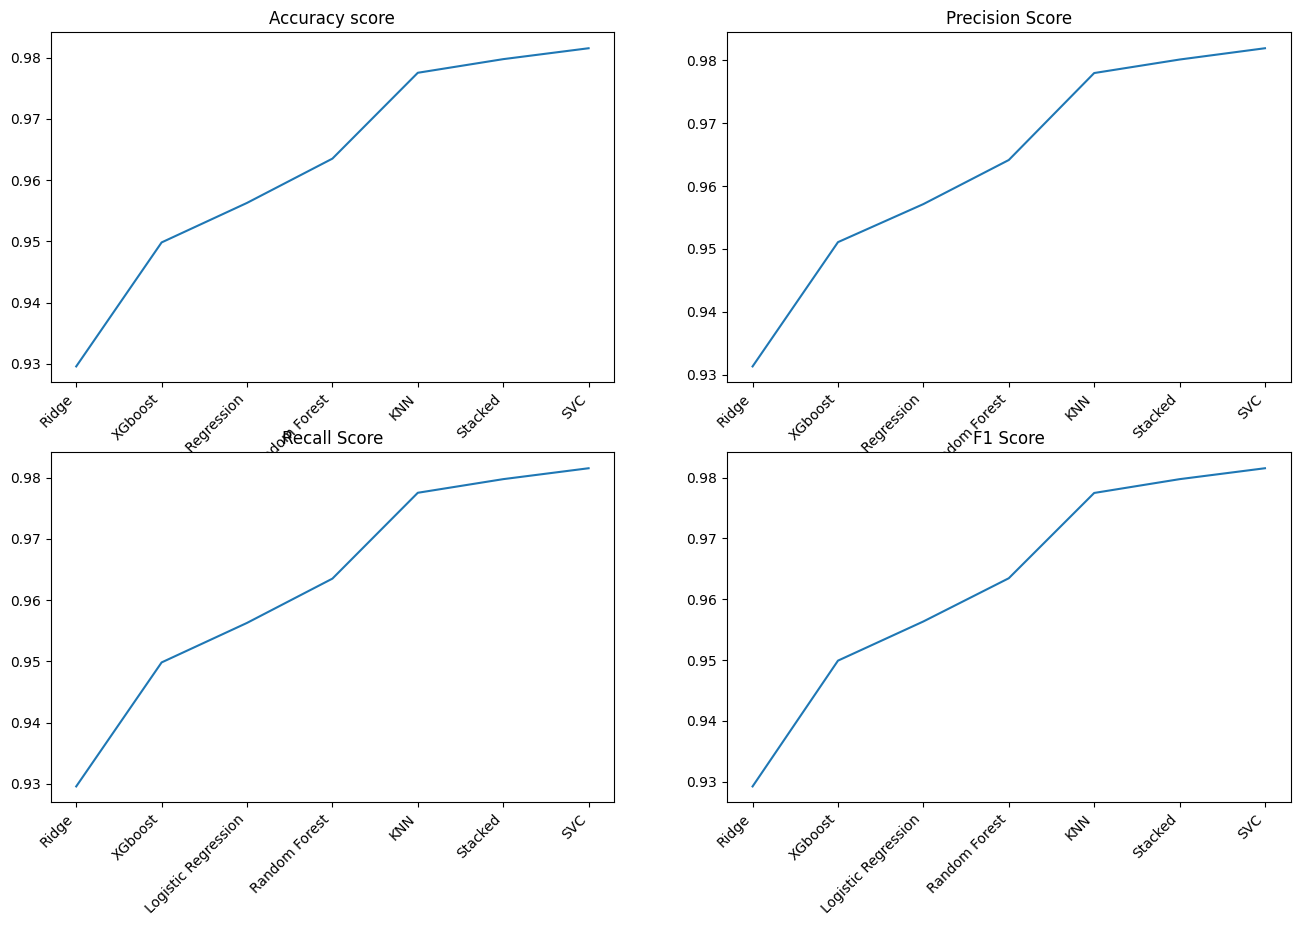

In [31]:
plt.figure(figsize=(16, 10)) 
plt.subplot(2, 2, 1)
plt.title("Accuracy score")
plt.plot(df_acc.mean() )
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(2, 2, 2)
plt.title("Precision Score")
plt.plot(df_prec.mean() )
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(2, 2, 3)
plt.title("Recall Score")
plt.plot(df_rec.mean() )
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(2, 2, 4)
plt.title("F1 Score")
plt.plot(df_f1.mean() )
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

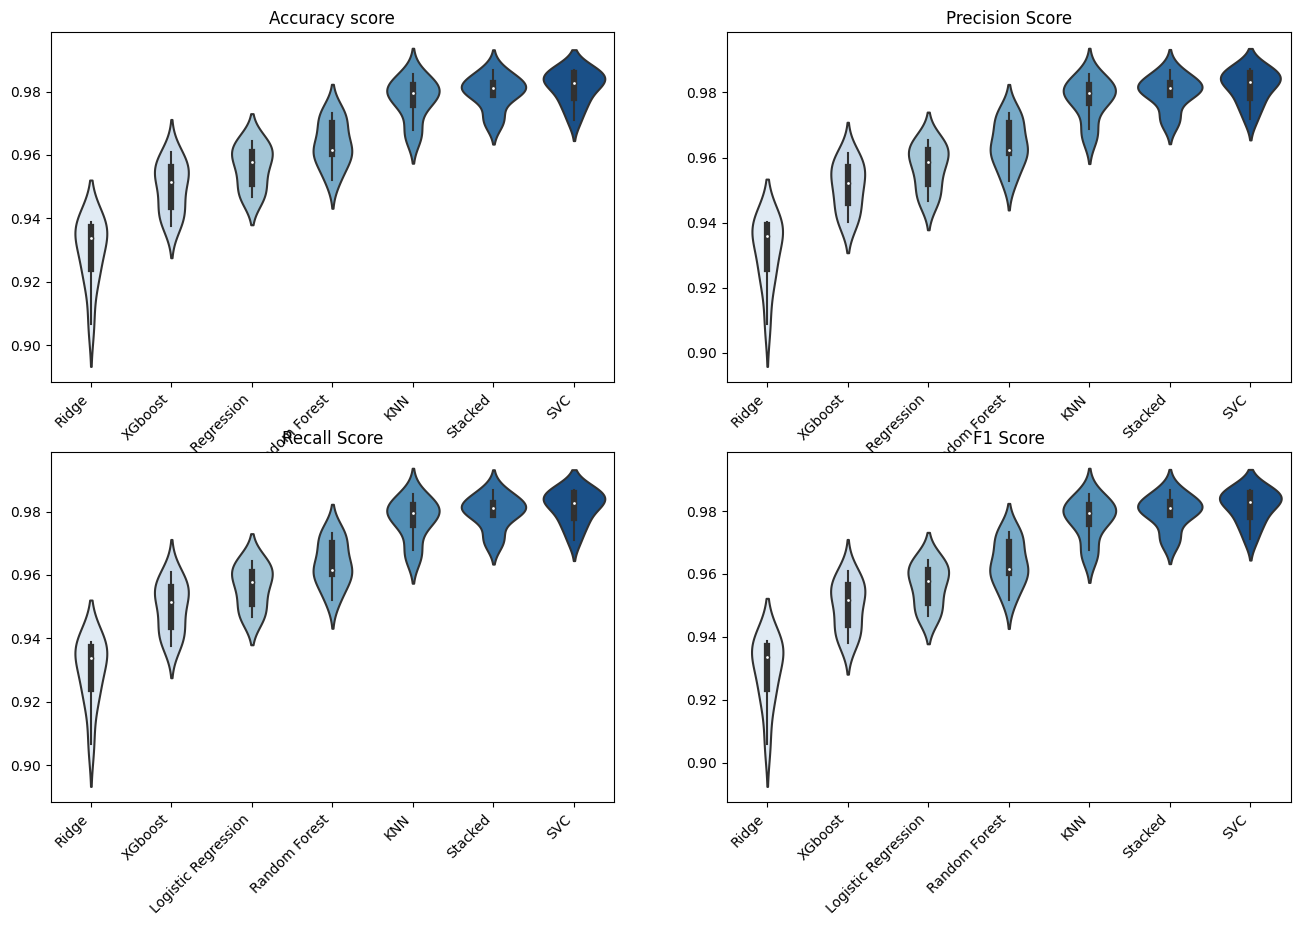

In [32]:
plt.figure(figsize=(16, 10)) 
plt.subplot(2, 2, 1)
plt.title("Accuracy score")
sns.violinplot(df_acc,palette="Blues" )
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(2, 2, 2)
plt.title("Precision Score")
sns.violinplot(df_prec, palette="Blues" )
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(2, 2, 3)
plt.title("Recall Score")
sns.violinplot(df_rec, palette="Blues" )
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(2, 2, 4)
plt.title("F1 Score")
sns.violinplot(df_f1, palette="Blues" )
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

*We can conclude that for this dataset , all models perform relatively well, being SVC, the one with the better metrics, followed by the Stacking method. With this dataset, we can see results quite different to the previous one, with XGboost being one of the models with the lowest scores.*

### *Now we'll analyze images of Cats and Dogs*
*Data obtained from https://www.kaggle.com/datasets/tongpython/cat-and-dog?select=training_set*

In [33]:
import opendatasets as od
 
od.download(
    "https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Skipping, found downloaded files in ".\cat-and-dog" (use force=True to force download)


In [34]:
import os.path

In [77]:
parent = os.path.dirname(os.getcwd())
# category and filepath to the train data
image_path1 = os.getcwd() + '/cat-and-dog/training_set/training_set/cats'
image_path2 = os.getcwd() + '/cat-and-dog/training_set/training_set/dogs'

In [78]:
def category(path): 
    return [file.split('.')[0] for file in os.listdir(path)]

def filename(path):
    return [file for file in os.listdir(path)]

In [79]:

#for cats

# image names and labels
x_train_imgname_c = filename(image_path1) 
#x_test_imgname = filename(test_dir)
y_train_label_c = category(image_path1)

images = []
 
# load all images into a list
for img in os.listdir(image_path1):
        if (img.endswith(".jpg")):
                img = os.path.join(image_path1, img)
                img = image.load_img(img, target_size=(64,64))
                img = image.img_to_array(img)
                img = np.expand_dims(img, axis=0)
                # normalize the image
                processed_image = np.array(img, dtype="float") / 255.0
                images.append(processed_image)
                
#images = np.vstack(images)

In [80]:
len(images)

4000

In [81]:
y_train_label_c = y_train_label_c[:-1]

In [82]:
#for dogs

# image names and labels
x_train_imgname_c = filename(image_path2) 
#x_test_imgname = filename(test_dir)
y_train_label_d = category(image_path2)
        
 
# load all images into a list
for img in os.listdir(image_path2):
        if (img.endswith(".jpg")):
                img = os.path.join(image_path2, img)
                img = image.load_img(img, target_size=(64,64))
                img = image.img_to_array(img)
                img = np.expand_dims(img, axis=0)
                # normalize the image
                processed_image = np.array(img, dtype="float") / 255.0
                images.append(processed_image)
        
images = np.vstack(images)

In [83]:
len(images)

8005

In [84]:
y_train_label_d = y_train_label_d[:-1]

In [85]:
images_df=pd.DataFrame(images.reshape(images.shape[0],images.shape[1]*images.shape[2]*images.shape[3]))

In [86]:
y_train_label = y_train_label_c + y_train_label_d

In [87]:
y_train_label=pd.Series(y_train_label)

In [88]:
#convert the target variable to binary
y_train_label=y_train_label.replace("cat",1)
y_train_label=y_train_label.replace("dog",0)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
   images_df , y_train_label, test_size=0.5, shuffle=True, random_state=114
)

In [93]:
# we define the base and the meta model
base_models_clas = [
    ('KNN', KNeighborsClassifier()),
    ('SVC',SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest',RandomForestClassifier()),
    ('XGboost',XGBClassifier()),
    ]
stacked_clas = StackingClassifier(   
    estimators = base_models_clas,
    final_estimator = LogisticRegression(    max_iter=1000
),
    cv = 5,
    )

In [94]:
acc_results=[]
f1_results=[]
mod_names = []
report_results =[]

for name, model in base_models_clas:
    start_time = time.time()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    end_time = time.time()
    
    report = metrics.classification_report(y_test, prediction, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    report_results.append(df_report)
    mod_names.append(name)

    print(name)
    print(df_report)
   
start_time = time.time()
stacked_clas.fit(X_train, y_train)    
stacked_prediction = stacked_clas.predict(X_test)
end_time = time.time()


report = metrics.classification_report(y_test, stacked_prediction, output_dict=True)
df_report = pd.DataFrame(report).transpose()

report_results.append(df_report)
mod_names.append("Stacked")

print("-------Stacked Ensemble-------")
print(df_report)

KNN
              precision    recall  f1-score      support
0              0.567460  0.359296  0.440000  1990.000000
1              0.535180  0.729260  0.617325  2013.000000
accuracy       0.545341  0.545341  0.545341     0.545341
macro avg      0.551320  0.544278  0.528663  4003.000000
weighted avg   0.551228  0.545341  0.529172  4003.000000
SVC
              precision    recall  f1-score      support
0              0.624031  0.647236  0.635422  1990.000000
1              0.637958  0.614506  0.626012  2013.000000
accuracy       0.630777  0.630777  0.630777     0.630777
macro avg      0.630994  0.630871  0.630717  4003.000000
weighted avg   0.631034  0.630777  0.630690  4003.000000
Decision Tree
              precision    recall  f1-score      support
0              0.527792  0.520101  0.523918  1990.000000
1              0.532321  0.539990  0.536128  2013.000000
accuracy       0.530102  0.530102  0.530102     0.530102
macro avg      0.530057  0.530045  0.530023  4003.000000
weighted 

In [95]:
stacked_clas.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('KNN', KNeighborsClassifier()), ('SVC', SVC()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier()),
                               ('XGboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=Fal...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [96]:
k=0
acc_list=[]
prec_list=[]
rec_list=[]
f1_list=[]
for i in report_results:
    acc_list.append(i.loc["accuracy","precision"])
    prec_list.append(i.loc["weighted avg","precision"])
    rec_list.append(i.loc["weighted avg","recall"])
    f1_list.append(i.loc["weighted avg","f1-score"])

In [97]:
sorted_lists = sorted(zip(acc_list, prec_list,rec_list, f1_list ,mod_names), key=lambda x: x[0])

In [98]:
acc_list = [x[0] for x in sorted_lists]
prec_list = [x[1] for x in sorted_lists]
rec_list = [x[2] for x in sorted_lists]
f1_list = [x[3] for x in sorted_lists]
mod_names2 = [x[4] for x in sorted_lists]

In [99]:
y_train_st=pd.Series(y_train.reset_index(drop=True))

*Now we will use a different library: Verstack to run a model with two layers of base models*

In [100]:
# initialize Stacker
stacker_mod = Stacker(objective = 'binary',
                  auto = False,
                  stacking_feats_depth = 2,
                  include_X = True)

In [101]:
stacker_mod.add_layer([XGBClassifier(max_depth = 10, n_jobs = -1)
, GradientBoostingClassifier(max_depth = 7)
, ExtraTreesClassifier(max_depth = 12)
, RandomForestClassifier(max_depth = 7)
, LogisticRegression()
, KNeighborsClassifier(n_neighbors=15)
, KNeighborsClassifier(n_neighbors=10)
, SVC(kernel = 'rbf')
, DecisionTreeClassifier(max_depth = 15)
, DecisionTreeClassifier(max_depth = 8)
, LGBMClassifier(max_depth = 3)
, RidgeClassifierCV()
])
stacker_mod.add_layer([GradientBoostingClassifier()
, SVC()])

In [103]:
X_st_mod

,0,1,2,3,4,5,6,7,8,9,...,diff_layer_1_9_layer_1_10,diff_layer_1_9_layer_1_11,diff_layer_1_10_layer_1_11,layer_1_std,layer_1_mean,layer_2_0,layer_2_1,diff_layer_2_0_layer_2_1,layer_2_std,layer_2_mean
0,0.254902,0.298039,0.180392,0.498039,0.568627,0.419608,0.482353,0.541176,0.427451,0.435294,...,0.028944,0.442623,0.413679,0.173918,0.305576,0.353504,0.0,0.353504,0.249965,0.176752
1,0.000000,0.019608,0.003922,0.286275,0.298039,0.317647,0.011765,0.015686,0.031373,0.031373,...,0.547258,1.000000,0.452742,0.317493,0.535036,0.383301,1.0,-0.616699,0.436072,0.691651
2,0.152941,0.196078,0.211765,0.141176,0.168627,0.200000,0.443137,0.396078,0.396078,0.474510,...,-0.392703,-0.756289,-0.363586,0.248900,0.668560,0.515822,1.0,-0.484178,0.342366,0.757911
3,0.223529,0.129412,0.082353,0.113725,0.098039,0.054902,0.819608,0.709804,0.615686,0.584314,...,0.311670,1.000000,0.688330,0.285765,0.701803,0.596408,1.0,-0.403592,0.285383,0.798204
4,0.556863,0.349020,0.294118,0.564706,0.356863,0.301961,0.588235,0.364706,0.321569,0.600000,...,0.035086,-0.391753,-0.426839,0.170352,0.751073,0.705308,1.0,-0.294692,0.208379,0.852654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,0.933333,0.933333,0.894118,0.933333,0.937255,0.882353,0.933333,0.933333,0.886275,0.933333,...,-0.154073,-0.900000,-0.745927,0.290975,0.378055,0.222798,0.0,0.222798,0.157542,0.111399
3998,0.454902,0.462745,0.411765,0.454902,0.462745,0.411765,0.466667,0.474510,0.423529,0.470588,...,-0.213945,-0.400000,-0.186055,0.239980,0.583197,0.813990,0.0,0.813990,0.575578,0.406995
3999,0.419608,0.415686,0.439216,0.447059,0.407843,0.400000,0.505882,0.482353,0.396078,0.749020,...,-0.082956,0.134884,0.217839,0.265538,0.333003,0.235597,0.0,0.235597,0.166592,0.117798
4000,0.160784,0.133333,0.164706,0.172549,0.149020,0.164706,0.149020,0.133333,0.129412,0.176471,...,-0.419002,-1.000000,-0.580998,0.330010,0.382665,0.221126,0.0,0.221126,0.156359,0.110563


In [102]:
X_st_mod = stacker_mod.fit_transform(X_train, y_train_st)


 * Initiating Stacker.fit_transform

   - Training/predicting with layer_1 models
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. Model not in optimisation list ExtraTreesClassifier(max_depth=12)
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predicted
     . Optimising model hyperparameters
     .. fold 2 trained/predicted
     .. fold 4 trained/predi

In [104]:
X_test_st_mod = stacker_mod.transform(X_test)


 * Initiating Stacker.transform



   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2


In [105]:
X_st_mod.to_csv("X_st_mod_classification.csv")
X_test_st_mod.to_csv("X_test_st_mod_classification.csv")

In [111]:
stacker_mod.save_stacker(os.getcwd())

Stacker instance saved to c:\Users\jesic\OneDrive\GIT\New folder\stacker_saved_model


In [121]:
# get lists of features created in each layer
layer_1_feats = stacker_mod.stacked_features['layer_1']
layer_2_feats = stacker_mod.stacked_features['layer_2']

In [122]:
model = LogisticRegression()

# use only the second layer outputs as inputs in to the final meta_model
model.fit(X_st_mod[layer_2_feats], y_train_st)

LogisticRegression()

In [123]:
report_results

[              precision    recall  f1-score      support
 0              0.567460  0.359296  0.440000  1990.000000
 1              0.535180  0.729260  0.617325  2013.000000
 accuracy       0.545341  0.545341  0.545341     0.545341
 macro avg      0.551320  0.544278  0.528663  4003.000000
 weighted avg   0.551228  0.545341  0.529172  4003.000000,
               precision    recall  f1-score      support
 0              0.624031  0.647236  0.635422  1990.000000
 1              0.637958  0.614506  0.626012  2013.000000
 accuracy       0.630777  0.630777  0.630777     0.630777
 macro avg      0.630994  0.630871  0.630717  4003.000000
 weighted avg   0.631034  0.630777  0.630690  4003.000000,
               precision    recall  f1-score      support
 0              0.527792  0.520101  0.523918  1990.000000
 1              0.532321  0.539990  0.536128  2013.000000
 accuracy       0.530102  0.530102  0.530102     0.530102
 macro avg      0.530057  0.530045  0.530023  4003.000000
 weighted av

In [124]:
pred = model.predict(X_test_st_mod[layer_2_feats])
report = metrics.classification_report(y_test, pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
report_results.append(df_report)

In [125]:
layer_1_feats = stacker_mod.stacked_features['layer_1']
layer_2_feats = stacker_mod.stacked_features['layer_2']

In [126]:
model = LogisticRegression()

# use both layers as inputs in to the final meta_model
model.fit(X_st_mod[layer_1_feats + layer_2_feats], y_train_st)
pred2 = model.predict(X_test_st_mod[layer_1_feats + layer_2_feats])

In [127]:
report2 = metrics.classification_report(y_test, pred2, output_dict=True)
df_report2 = pd.DataFrame(report2).transpose()
report_results.append(df_report2)

In [128]:
mod_names.append("Stacked 2nd Layer")

In [129]:
mod_names.append("Stacked 2nd and 1st Layer")

In [130]:
k=0
acc_list=[]
prec_list=[]
rec_list=[]
f1_list=[]
for i in report_results:
    acc_list.append(i.loc["accuracy","precision"])
    prec_list.append(i.loc["weighted avg","precision"])
    rec_list.append(i.loc["weighted avg","recall"])
    f1_list.append(i.loc["weighted avg","f1-score"])
sorted_lists = sorted(zip(acc_list, prec_list,rec_list, f1_list ,mod_names), key=lambda x: x[0])
acc_list = [x[0] for x in sorted_lists]
prec_list = [x[1] for x in sorted_lists]
rec_list = [x[2] for x in sorted_lists]
f1_list = [x[3] for x in sorted_lists]
mod_names2 = [x[4] for x in sorted_lists]

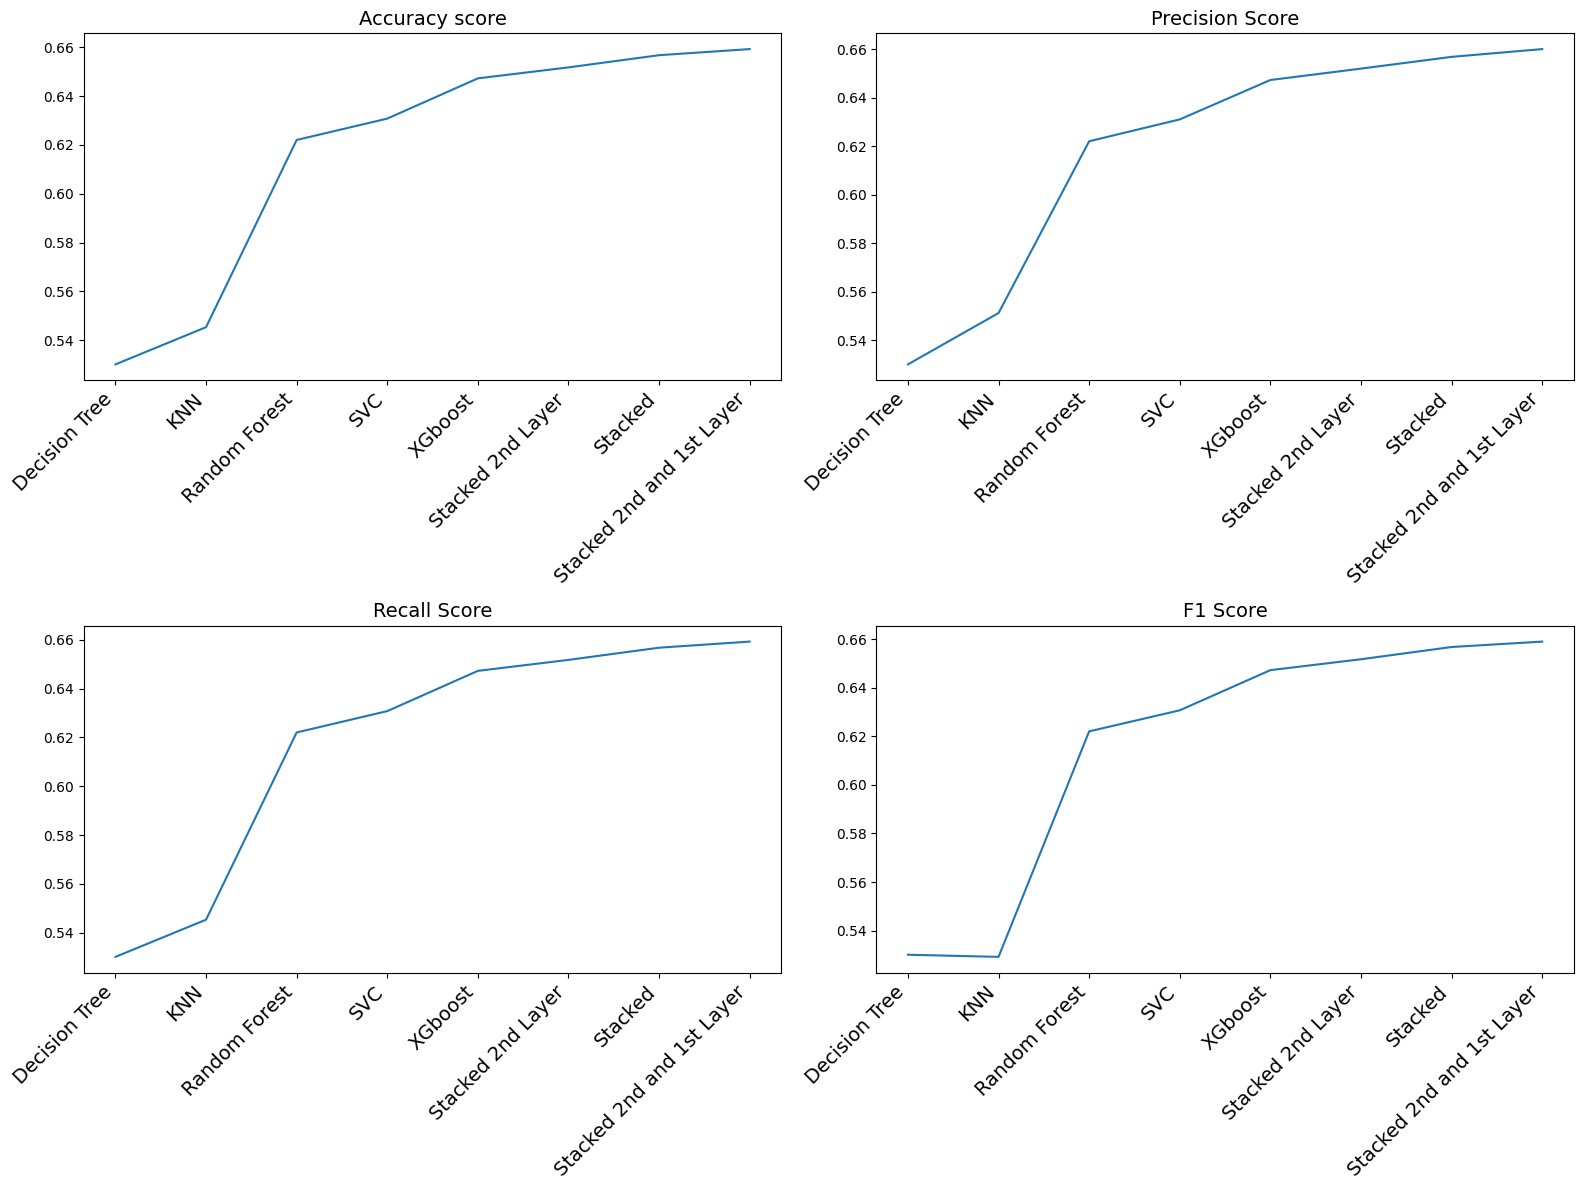

In [131]:
plt.figure(figsize=(16, 12)) 
plt.subplot(2, 2, 1)
plt.title("Accuracy score", fontsize=14)
plt.plot(mod_names2,acc_list, )
plt.xticks(rotation=45, ha='right', fontsize=14)

plt.subplot(2, 2, 2)
plt.title("Precision Score", fontsize=14)
plt.plot(mod_names2,prec_list, )
plt.xticks(rotation=45, ha='right', fontsize=14)

plt.subplot(2, 2, 3)
plt.title("Recall Score", fontsize=14)
plt.plot(mod_names2,rec_list, )
plt.xticks(rotation=45, ha='right', fontsize=14)

plt.subplot(2, 2, 4)
plt.title("F1 Score", fontsize=14)
plt.plot(mod_names2,f1_list, )
plt.xticks(rotation=45, ha='right', fontsize=14)

plt.tight_layout()
plt.show()

*We generate a function to test the final model: Stacked 2nd and 1st layer on our own pictures*

In [132]:
def predict_image(img1):
    img = image.load_img(img1, target_size=(64,64))
    img_print = image.load_img(img1, target_size=(250,250))
    img = ImageOps.exif_transpose(img)
    img_print = ImageOps.exif_transpose(img_print)
    img_a = image.img_to_array(img)
    img_a = np.expand_dims(img_a, axis=0)
    # normalize the image
    processed_image = np.array(img_a, dtype="float") / 255.0
    image_for_test=pd.DataFrame(processed_image.reshape(processed_image.shape[0],processed_image.shape[1]*processed_image.shape[2]*processed_image.shape[3]))
    X_test_st_mod = stacker_mod.transform(image_for_test)
    predic = model.predict(X_test_st_mod[layer_1_feats + layer_2_feats])
    categ= "Cat" if predic==1 else "Dog"
    print(f"Category: {categ}")
    return img_print, categ

In [133]:
def predict_image_rot(img1):
    img = image.load_img(img1, target_size=(64,64))
    img_print = image.load_img(img1, target_size=(250,250))
    img = ImageOps.exif_transpose(img)
    img_print = ImageOps.exif_transpose(img_print)
    img_a = image.img_to_array(img)
    img_a = np.expand_dims(img_a, axis=0)
    # normalize the image
    processed_image = np.array(img_a, dtype="float") / 255.0
    image_for_test=pd.DataFrame(processed_image.reshape(processed_image.shape[0],processed_image.shape[1]*processed_image.shape[2]*processed_image.shape[3]))
    X_test_st_mod = stacker_mod.transform(image_for_test)
    predic = model.predict(X_test_st_mod[layer_1_feats + layer_2_feats])
    categ= "Cat" if predic==1 else "Dog"
    print(f"Category: {categ}")
    return img_print, categ

In [134]:
from PIL import Image, ImageOps


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Dog


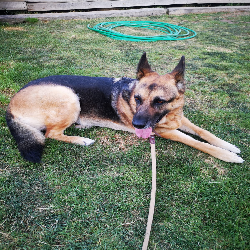

In [139]:
image_, predic = predict_image(os.getcwd()+"/Images/"+"Suyai.jpg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Cat


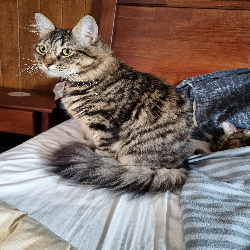

In [140]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/"+"Titito.jpg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Dog


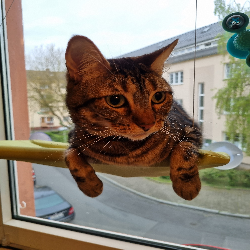

In [141]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/"+"Teito.jpg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Dog


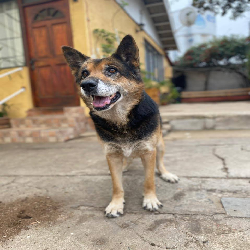

In [142]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/" + "Bonin.jpg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Cat


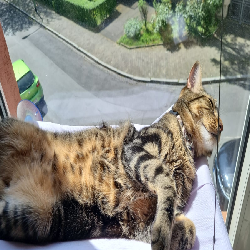

In [143]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/" + "Teito2.jpg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Dog


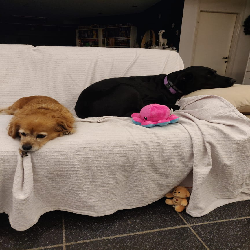

In [144]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/" + "1.jpeg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Dog


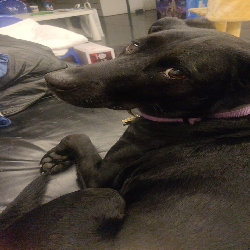

In [145]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/" + "2.jpeg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Dog


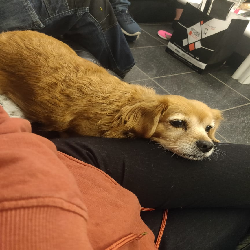

In [146]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/" + "3.jpeg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Dog


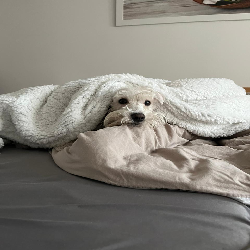

In [147]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/" + "4.jpeg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Cat


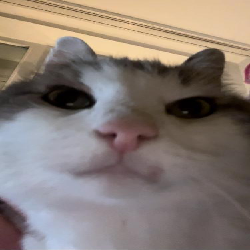

In [148]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/" + "5.jpeg")
image_


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12

   - Predicting with layer_2 models
     . predicted with model 1
     . predicted with model 2
Category: Dog


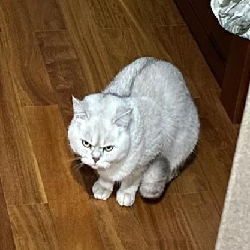

In [149]:
image_, predic = predict_image_rot(os.getcwd()+"/Images/" + "6.jpeg")
image_

*With this last dataset analyzed we can see that we obtained lower scores compared to the previous ones, as expected since we are working with images. However, stacking models are able to outperform single models, and produce models better than a random classifier.*

## *Limitations​*

*   What model to choose as the meta-model?​
    * Often just a simple model such as Linear Regression for regression tasks and Logistic Regression for classification tasks
<br>
<br>    
*   Added complexity: the final model becomes much harder to explain​

*   Added computation time​

*   Improvement stacking together models is only the most effective while using none or low correlated base models​

*   Multi-level Stacking: adding levels can either be:​

    *   Data expensive (if k-folds like technique is not used $\rightarrow$  more data are needed)​
    *   Time expensive (if k-folds like technique is used $\rightarrow$ a lot of models need to be fitted)

## *Takeaways*

Why use ensemble learning? 

*   Better accuracy (low error) 

*   Higher consistency (avoid overfitting) 

*   Reduce bias and variance errors 

When and where to use ensemble learning? 

*   Single model overfits 

*   Results worth extra training 

*   Can be used for classification and regression 

Ensemble learning is a machine learning paradigm where multiple models (often called weak learners or base models) are trained to solve the same problem and combined to get better performances 

The main hypothesis is that if we combine the weak learners the right way, we can obtain more accurate and/or robust models 

Risk of overfitting

## *References*

Kevin P. Murphy (2012), Machine Learning: A Probabilistic Perspective, MIT Press.​

Sammut, C. & Webb, G. I. (eds.) (2017). Encyclopedia of Machine Learning and Data Mining. New York: Springer. ISBN: 978-1-4899-7685-7 ​

https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c ​

https://towardsdatascience.com/stacked-ensembles-improving-model-performance-on-a-higher-level-99ffc4ea5523 ​

https://neptune.ai/blog/ensemble-learning-guide​

https://scikit-learn.org/stable/modules/ensemble.html ​

https://verstack.readthedocs.io/en/latest/​

https://danilzherebtsov.medium.com/meet-stacker-automated-ensemble-creation-library-abcad0648a5d​